# Welcome to the Sendy Logistics Challenge

In [113]:
# import the pandas module
import pandas as pd
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
#import numpy module
import numpy as np
from matplotlib import rc
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Train Dataset
### Dataset used to train prediction model

In [114]:
# Train Dataset
train_df = pd.read_csv('Train.csv')
train_df.head(10)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
5,Order_No_7408,User_Id_1342,Bike,3,Business,14,5,3:07:35 PM,14,5,...,4:23:41 PM,9,27.2,NaN,-1.302583,36.767081,-1.257309,36.806008,Rider_Id_124,3191
6,Order_No_22680,User_Id_2803,Bike,3,Business,9,5,9:33:45 AM,9,5,...,10:19:45 AM,5,20.3,NaN,-1.279395,36.825364,-1.276574,36.851365,Rider_Id_114,1380
7,Order_No_21578,User_Id_1075,Bike,3,Business,11,1,2:13:01 PM,11,1,...,2:33:26 PM,3,28.7,NaN,-1.252796,36.800313,-1.255189,36.782203,Rider_Id_913,646
8,Order_No_5234,User_Id_733,Bike,3,Business,30,2,11:10:44 AM,30,2,...,1:19:35 PM,9,NaN,NaN,-1.255189,36.782203,-1.300255,36.825657,Rider_Id_394,3398
9,Order_No_1768,User_Id_2112,Bike,3,Business,23,5,4:48:54 PM,23,5,...,6:31:57 PM,14,24.6,NaN,-1.225322,36.808550,-1.215601,36.891686,Rider_Id_660,3439


In [115]:
train_df = pd.merge(train_df,riders_df,on="Rider Id")

In [116]:
train_df['Order No'] = train_df['Order No'].map(lambda x: x.lstrip('Order_No_'))


In [117]:
train_df['Rider Id'] = train_df['Rider Id'].map(lambda x: x.lstrip('Rider_Id_'))

In [118]:
train_df['User Id'] = train_df['User Id'].map(lambda x: x.lstrip('User_Id_'))

In [119]:
def remove_colon(number):
    if number[-1]==':' or number[-1]=='A' or number[-1]=='P' :
        number = number[:-1]
        
    return number

def convert_dates_to_seconds(df, date="Pickup - Day of Month",
                              time="Pickup - Time"):
    """takes in pandas dataframe and converts time stamps
    into seconds """
    date_in_seconds = []
    days_in_seconds = (df[date]-1)*3600*24
    
    for i in range(len(df)):
        hours = int(remove_colon(df[time][i][:2]))
        mins =  int(remove_colon(df[time][i][3:5]))
        seconds =  int(remove_colon(df[time][i][6:9]))
        
        if df[time][i][-2:] =='PM':
            date_in_seconds.append((hours+12)*3600+mins*60+seconds)
            
        else:
            date_in_seconds.append((hours)*3600+mins*60+seconds)
                
        
    
    return date_in_seconds

In [120]:
def correct_data_format(df):
    train_df = df.copy()
    """takes in data frame and transforms it into preferred data frame """
    
    #convert dates
    train_df["Placement - Time"] = convert_dates_to_seconds(train_df,date= "Placement - Day of Month",time ="Placement - Time")
    train_df["Confirmation - Time"] = convert_dates_to_seconds(train_df,date= "Confirmation - Day of Month",time ="Confirmation - Time")
    train_df["Pickup - Time"] = convert_dates_to_seconds(train_df,date= "Pickup - Day of Month",time ="Pickup - Time")
    train_df["Arrival at Pickup - Time"] = convert_dates_to_seconds(train_df,date= "Arrival at Pickup - Day of Month",time ="Arrival at Pickup - Time")
    #drop columns
    train_df.drop(["Placement - Day of Month","Confirmation - Day of Month", "Precipitation in millimeters",
             "Pickup - Day of Month","Arrival at Destination - Day of Month",
            "Arrival at Destination - Time","Vehicle Type"],axis=1,inplace=True)

    
    
    return train_df

In [121]:
train_df = correct_data_format(train_df)

In [122]:
train_df["Temperature"] = train_df["Temperature"].fillna(value=train_df["Temperature"].mean())


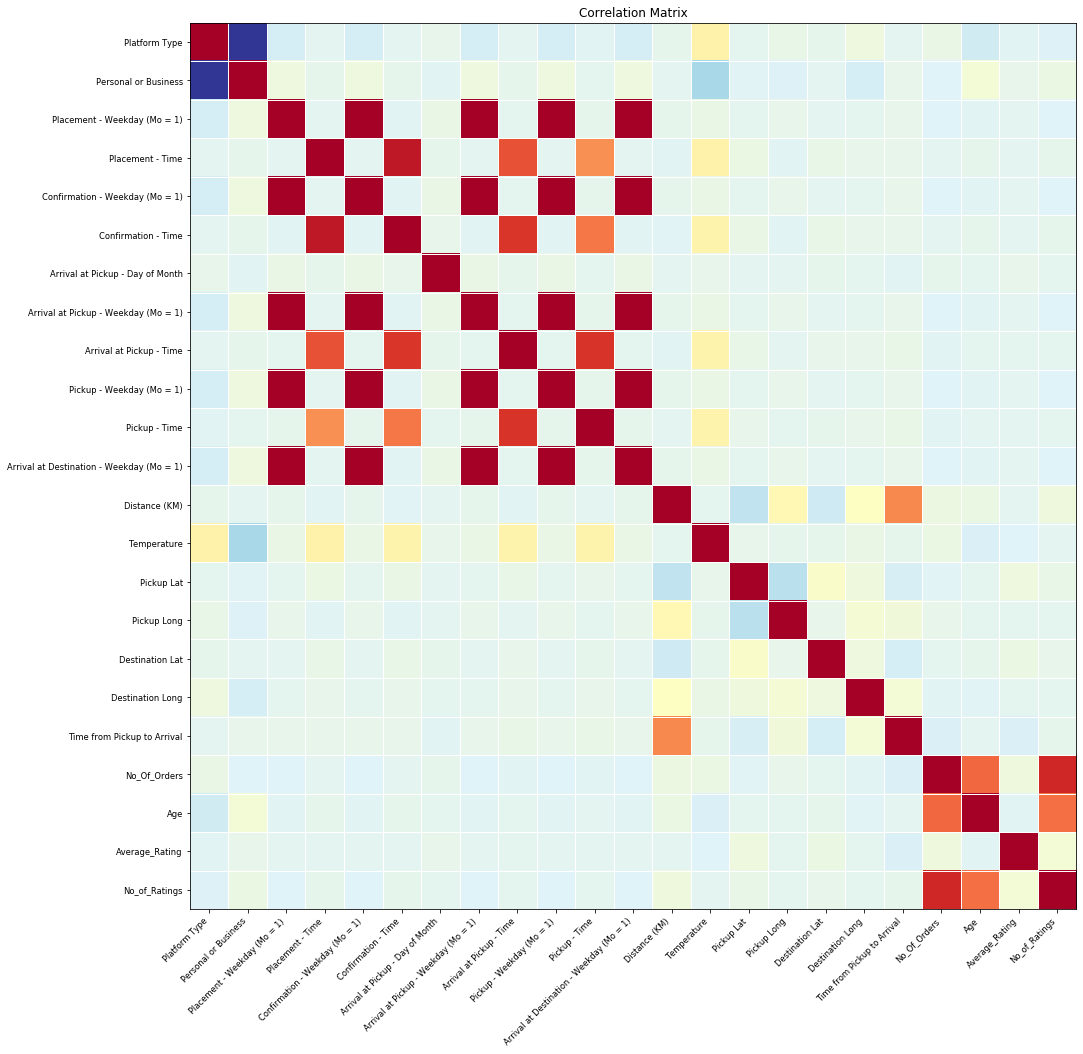

In [146]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(train_df.corr(), xnames = train_df.corr().columns, ax = ax);

In [123]:
train_df

,Order No,User Id,Platform Type,Personal or Business,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,4211,633,3,Business,5,32706,5,32400,9,5,...,-1.317755,36.830370,-1.300406,36.829741,432,745,1637,1309,13.8,549
1,27440,2642,3,Personal,5,54067,5,54060,18,5,...,-1.326774,36.787807,-1.356237,36.904295,432,2886,1637,1309,13.8,549
2,14170,3339,3,Business,5,89501,5,46929,31,5,...,-1.255189,36.782203,-1.273412,36.818206,432,2615,1637,1309,13.8,549
3,21727,3523,3,Personal,2,25320,2,25329,2,2,...,-1.290315,36.757377,-1.223520,36.802061,432,2986,1637,1309,13.8,549
4,8301,87,2,Personal,2,38458,2,38544,22,2,...,-1.273524,36.799220,-1.300431,36.752427,432,1602,1637,1309,13.8,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,27103,3718,3,Business,2,40177,2,41538,13,2,...,-1.265003,36.812624,-1.265432,36.795034,528,919,5770,1793,14.2,2205
21197,3786,1558,3,Personal,4,57787,4,58027,21,4,...,-1.269609,36.825741,-1.278067,36.783487,638,2331,102,873,13.7,32
21198,7281,2008,3,Business,1,61200,1,61261,10,1,...,-1.250823,36.789526,-1.285850,36.830629,773,2418,5,105,0.0,0
21199,15575,1346,3,Business,2,50465,2,50523,29,2,...,-1.291787,36.787267,-1.298575,36.808800,860,717,5,448,15.0,2


# multi-linear Regression

In [147]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
train_df['Personal or Business'] = labelencoder.fit_transform(train_df['Personal or Business'])





In [148]:
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = train_df.drop(['Time from Pickup to Arrival'], axis=1)
y = train_df['Time from Pickup to Arrival']

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)

In [150]:
#from sklearn.linear_model import Lasso
#lasso = Lasso(alpha=0.01)


In [151]:
# create model object
lm = LinearRegression()
lm.fit(X_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [153]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [154]:
print("Intercept:", beta_0)

Intercept: 1556.920947125139


In [155]:
beta_js

,Coefficient
Order No,-13.010872
User Id,12.336999
Platform Type,13.774826
Personal or Business,18.424816
Placement - Weekday (Mo = 1),-663.671129
Placement - Time,-9.648096
Confirmation - Weekday (Mo = 1),167.585645
Confirmation - Time,14.432664
Arrival at Pickup - Day of Month,-8.334818
Arrival at Pickup - Weekday (Mo = 1),167.585645


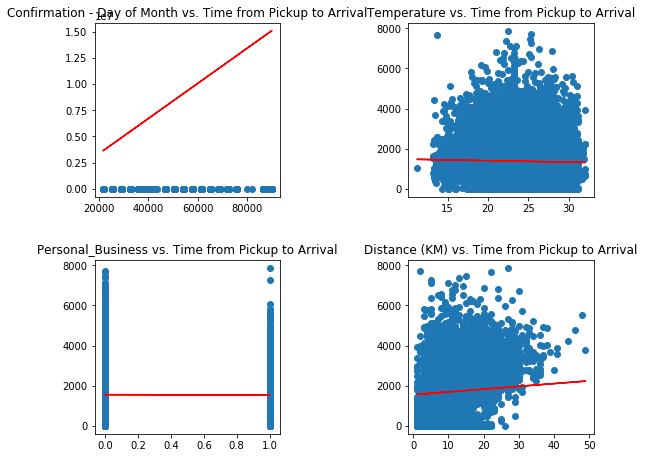

In [145]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(train_df['Placement - Time'], train_df['Time from Pickup to Arrival'])
axs[0,0].plot(train_df['Placement - Time'], lm.intercept_ + lm.coef_[6]*train_df['Placement - Time'], color='red')
axs[0,0].title.set_text('Confirmation - Day of Month vs. Time from Pickup to Arrival')

axs[0,1].scatter(train_df['Temperature'], train_df['Time from Pickup to Arrival'])
axs[0,1].plot(train_df['Temperature'], lm.intercept_ + lm.coef_[-6]*train_df['Temperature'], color='red')
axs[0,1].title.set_text('Temperature vs. Time from Pickup to Arrival')

axs[1,0].scatter(train_df['Personal or Business'], train_df['Time from Pickup to Arrival'])
axs[1,0].plot(train_df['Personal or Business'], lm.intercept_ + lm.coef_[0]*train_df['Personal or Business'], color='red')
axs[1,0].title.set_text('Personal_Business vs. Time from Pickup to Arrival')

axs[1,1].scatter(train_df['Distance (KM)'], train_df['Time from Pickup to Arrival'])
axs[1,1].plot(train_df['Distance (KM)'], lm.intercept_ + lm.coef_[2]*train_df['Distance (KM)'], color='red')
axs[1,1].title.set_text('Distance (KM) vs. Time from Pickup to Arrival')

fig.tight_layout(pad=3.0)

plt.show()

In [177]:
y_pred = lm.predict(X_scaled)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y,y_pred)))

RMSE: 796.1564017263167


# Random Forrests

In [158]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(X_scaled,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [159]:
from sklearn.metrics import mean_squared_error

In [162]:
y_pred = RF.predict(X_scaled)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y,y_pred)))

RMSE: 775.7119965353696


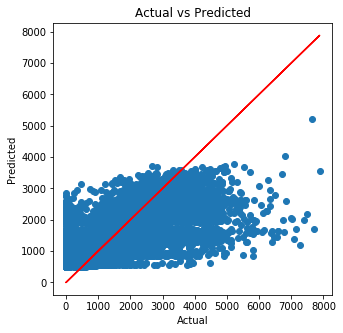

In [163]:
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y,y_pred)
ax.plot(y,y,'r')
plt.show()

In [164]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [166]:
forest_2.fit(X_scaled, y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=23, verbose=0, warm_start=False)

In [168]:
forest_3.fit(X_scaled, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=23, verbose=0, warm_start=False)

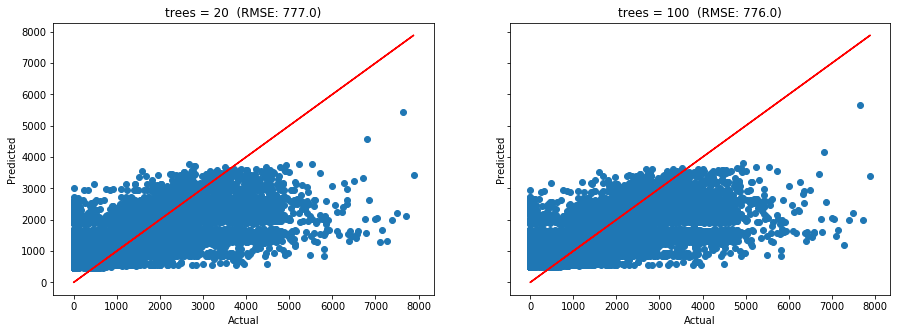

In [176]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_2.predict(X_scaled), forest_3.predict(X_scaled)]
title = ['trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(2):
    rmse = round(np.sqrt(mean_squared_error(y,pred[i])))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y,y,'r')
    ax[i].scatter(y,pred[i])

# results

Random forrests gives a better RMSE compared to Linear

## Test Dataset
### Dataset used to test prediction accuracy of model

In [94]:
# Test Dataset
test_df = pd.read_csv('Test.csv')
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [96]:
test_df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,19248,3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,NaN,-1.333275,36.870815,-1.305249,36.822390,192,439,1511,13.3,171
1,2699,592,Bike,1,Personal,26,2,2:43:21 PM,26,2,...,NaN,-1.312745,36.875715,-1.288435,36.760677,192,439,1511,13.3,171
2,21486,478,Bike,3,Business,29,5,11:55:05 AM,29,5,...,NaN,-1.255189,36.782203,-1.293393,36.790237,192,439,1511,13.3,171
3,19336,2801,Bike,3,Business,2,1,9:23:21 AM,2,1,...,NaN,-1.310451,36.868724,-1.259542,36.787118,192,439,1511,13.3,171
4,20374,3465,Bike,3,Business,14,4,12:55:59 PM,14,4,...,NaN,-1.333275,36.870815,-1.255189,36.782203,192,439,1511,13.3,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,5207,635,Bike,3,Business,8,5,12:56:22 PM,8,5,...,NaN,-1.300921,36.828195,-1.272807,36.796236,738,2849,2506,14.2,427
7064,11108,2154,Bike,3,Business,9,3,3:08:38 PM,9,3,...,NaN,-1.316959,36.700003,-1.276574,36.851365,443,3504,2234,14.6,1086
7065,15696,1899,Bike,3,Business,31,5,1:25:34 PM,31,5,...,NaN,-1.303596,36.778378,-1.330611,36.848052,176,417,136,12.8,34
7066,14332,1245,Bike,3,Business,11,1,8:55:12 AM,11,1,...,NaN,-1.300921,36.828195,-1.319862,36.711032,181,34,291,15.0,5


In [103]:
test_df = correct_data_format(test_df)


In [104]:
test_df

,Order No,User Id,Platform Type,Personal or Business,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,19248,3355,3,Business,3,57840,3,57849,27,3,...,23.24612,-1.333275,36.870815,-1.305249,36.822390,192,439,1511,13.3,171
1,2699,592,1,Personal,2,50581,2,50826,26,2,...,23.24612,-1.312745,36.875715,-1.288435,36.760677,192,439,1511,13.3,171
2,21486,478,3,Business,5,42905,5,43092,29,5,...,19.70000,-1.255189,36.782203,-1.293393,36.790237,192,439,1511,13.3,171
3,19336,2801,3,Business,1,32581,1,32584,2,1,...,16.40000,-1.310451,36.868724,-1.259542,36.787118,192,439,1511,13.3,171
4,20374,3465,3,Business,4,89759,4,46924,14,4,...,21.30000,-1.333275,36.870815,-1.255189,36.782203,192,439,1511,13.3,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,5207,635,3,Business,5,89782,5,46980,8,5,...,27.10000,-1.300921,36.828195,-1.272807,36.796236,738,2849,2506,14.2,427
7064,11108,2154,3,Business,3,54488,3,54427,9,3,...,25.10000,-1.316959,36.700003,-1.276574,36.851365,443,3504,2234,14.6,1086
7065,15696,1899,3,Business,5,47104,5,46920,31,5,...,24.90000,-1.303596,36.778378,-1.330611,36.848052,176,417,136,12.8,34
7066,14332,1245,3,Business,1,29102,1,29106,11,1,...,20.90000,-1.300921,36.828195,-1.319862,36.711032,181,34,291,15.0,5


In [106]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
test_df['Personal or Business'] = labelencoder.fit_transform(test_df['Personal or Business'])

In [108]:
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X_test = test_df
y = train_df['Time from Pickup to Arrival']

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)

In [111]:
lm = LinearRegression()

In [112]:
lm.fit(X_standardise, y)

ValueError: Found input variables with inconsistent numbers of samples: [7068, 21201]

## Riders Dataset

In [7]:
# Riders Dataset
riders_df = pd.read_csv('Riders.csv')
riders_df.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


## Variable Definitions for Datasets

In [ ]:
# Variable Definitions Dataset
var_def_df = pd.read_csv('data/VariableDefinitions.csv')
var_def_df.head()

# Sample submission

In [ ]:
# Sample Submission
sub_sample_df = pd.read_csv('data/SampleSubmission.csv')
sub_sample_df.head()